<a href="https://colab.research.google.com/github/Hanshita26/4-6-24/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dependencies

In [2]:
import numpy as np # arrays
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting and graph purpose
import seaborn as sns # statistical visualizations
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the dataset - House price prediction


In [3]:
house_price_dataset = pd.read_csv('/content/House Price Prediction Dataset.csv')

In [4]:
print(house_price_dataset)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition Garage   Price
0        1  1360         5          4       3       1970  Downtown  Excellent     No  149919
1        2  4272         5          4       3       1958  Downtown  Excellent     No  424998
2        3  3592         2          2       3       1938  Downtown       Good     No  266746
3        4   966         4          2       2       1902  Suburban       Fair    Yes  244020
4        5  4926         1          4       2       1975  Downtown       Fair    Yes  636056
...    ...   ...       ...        ...     ...        ...       ...        ...    ...     ...
1995  1996  4994         5          4       3       1923  Suburban       Poor     No  295620
1996  1997  3046         5          2       1       2019  Suburban       Poor    Yes  580929
1997  1998  1062         5          1       2       1903     Rural       Poor     No  476925
1998  1999  4062         3          1       2       1936     Urban  Ex

In [5]:
print(type(house_price_dataset))


<class 'pandas.core.frame.DataFrame'>


In [6]:
print(house_price_dataset.head())

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition Garage   Price
0   1  1360         5          4       3       1970  Downtown  Excellent     No  149919
1   2  4272         5          4       3       1958  Downtown  Excellent     No  424998
2   3  3592         2          2       3       1938  Downtown       Good     No  266746
3   4   966         4          2       2       1902  Suburban       Fair    Yes  244020
4   5  4926         1          4       2       1975  Downtown       Fair    Yes  636056


In [7]:
print(house_price_dataset.shape)

(2000, 10)


In [8]:
# add the target(price) column to the dataframe
house_price_dataset.rename(columns={'Price': 'price'}, inplace=True)


In [9]:
print(house_price_dataset.head()) # gives first 5 rows

   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition Garage   price
0   1  1360         5          4       3       1970  Downtown  Excellent     No  149919
1   2  4272         5          4       3       1958  Downtown  Excellent     No  424998
2   3  3592         2          2       3       1938  Downtown       Good     No  266746
3   4   966         4          2       2       1902  Suburban       Fair    Yes  244020
4   5  4926         1          4       2       1975  Downtown       Fair    Yes  636056


In [10]:
# check for missing values if any
house_price_dataset.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
price,0


In [11]:
# statistical measures of the dataset
house_price_dataset.describe()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


Understanding the correlation between various features in the dataset



1.Positive Correlation

2.Negative Correlation


In [14]:
house_price_dataset = house_price_dataset.apply(pd.to_numeric, errors='coerce')
correlation = house_price_dataset.corr()


<Axes: >

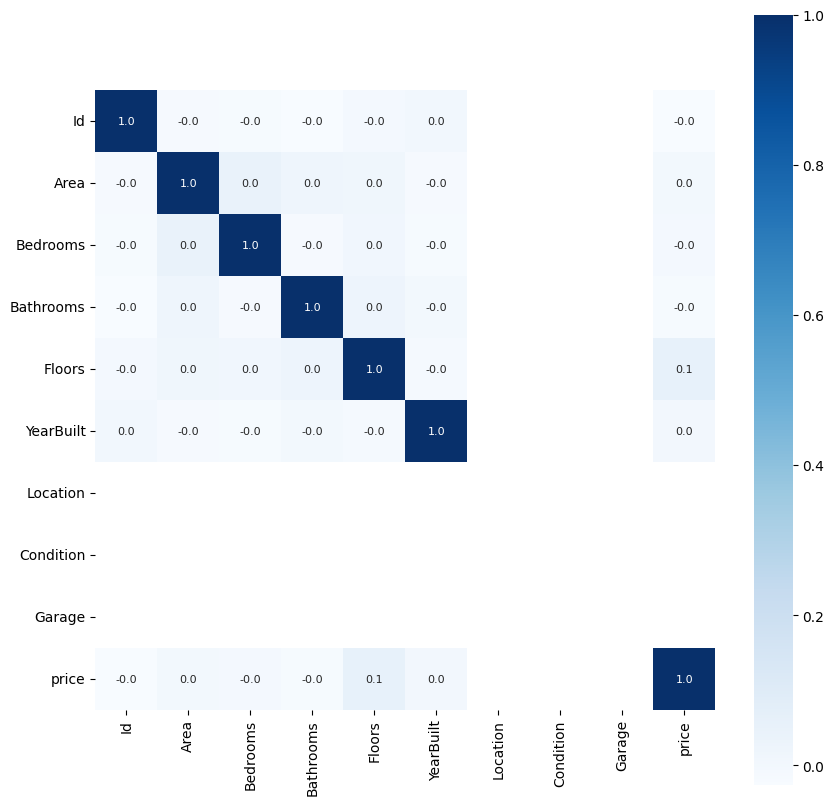

In [15]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues') # seven parameters are there
# cbar = colorbar, fmt - float value , annot - features names

Splitting the data and the target


In [17]:
X = house_price_dataset.drop(columns=['price'], axis=1)
Y = house_price_dataset['price']

In [18]:
print(X)
print(Y)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  Garage
0        1  1360         5          4       3       1970       NaN        NaN     NaN
1        2  4272         5          4       3       1958       NaN        NaN     NaN
2        3  3592         2          2       3       1938       NaN        NaN     NaN
3        4   966         4          2       2       1902       NaN        NaN     NaN
4        5  4926         1          4       2       1975       NaN        NaN     NaN
...    ...   ...       ...        ...     ...        ...       ...        ...     ...
1995  1996  4994         5          4       3       1923       NaN        NaN     NaN
1996  1997  3046         5          2       1       2019       NaN        NaN     NaN
1997  1998  1062         5          1       2       1903       NaN        NaN     NaN
1998  1999  4062         3          1       2       1936       NaN        NaN     NaN
1999  2000  2989         5          1       3       19

Splitting the data into train and test data


In [24]:
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)# 0.2 means 20% data is testing data

In [39]:
print(X.shape , X_train.shape, X_test.shape)

(2000, 9) (1600, 9) (400, 9)


Model training

XGBoost Regressor - decision tree model kind of



In [26]:
# loading the model
model = XGBRegressor()


In [28]:
# training the model with X_train
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [29]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [30]:
print(training_data_prediction)

[492829.6  915949.75 444090.16 ... 729943.8  523628.47 797256.56]


Comparing predicted value with the originally mentionaed values


In [31]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R sqaured error: ', score_1) # it is approx 0.94 close to 1 which shows model is producing good results.
print('Mean absolute error: ',score_2) # compare with the mean and std

R sqaured error:  0.9481112360954285
Mean absolute error:  46690.00390625


In [33]:
house_price_dataset['price'].describe()

,price
count,2000.000000
mean,537676.855000
std,276428.845719
min,50005.000000
25%,300098.000000
50%,539254.000000
75%,780086.000000
max,999656.000000


Prediction on test data

In [34]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 843268.9   583906.3   641589.7   407898.97  682382.4   306823.22
  539643.9   676052.25  793186.6   530927.75  530118.7   467530.2
  669130.1   418871.4   683824.25  628706.9   567609.3   716671.1
  672775.25  551144.3   635449.7   923010.    597481.    791724.56
  424887.16  629512.9   532019.25  449980.25  621718.5   796702.25
  540276.5   467938.84  429658.1   642939.4   537956.8   307888.9
  546287.    553892.8   798516.06  638230.75  537416.3   508596.1
  386632.47  591671.7   555038.5   529414.9   562251.06  652762.3
  507134.47  602431.06  682967.4   519281.6   485762.8   620695.94
  496273.1   578267.5   587754.5   558221.44  606781.5  1122537.4
  650486.5   846412.    477074.44  522309.78  584912.1   615700.3
  526648.94  597238.25  622101.25  790298.5   407949.38  419458.06
  380653.34  643546.06  631747.44  370725.16  421737.97  436444.53
  382244.78  939313.44  398379.44  649547.44  713359.6   729058.6
  157615.02  410094.97  506978.78  532470.75  629055.75  300481.5
  44

In [42]:
# R squared error
score_test_1 =  metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_test_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R sqaured error: ', score_test_1)
print('Mean absolute error: ',score_test_2)

R sqaured error:  -0.30433523654937744
Mean absolute error:  270021.8125


Visualizing the actual prices and predicted prices

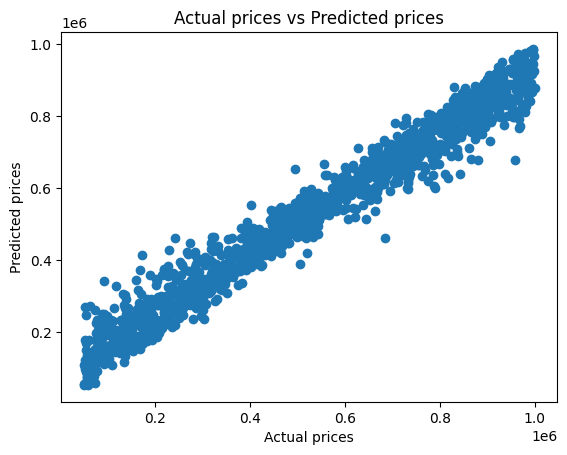

In [43]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs Predicted prices')
plt.show()
